## Project Objective

Sentiment analysis, also known as opinion mining, is the task of automatically identifying the sentiment expressed in a piece of text, such as a movie review. In this case, the text data is movie reviews from IMDB, and the goal is to classify the sentiment of each review as positive, negative, or neutral. 

With the use of spaCy, a popular open-source library for NLP, the solution will involve natural language processing techniques to preprocess the text data and extract features for the classification model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load('en_core_web_sm')

## IMDB

In [2]:
imdb_data = pd.read_csv('/Users/brindhamanivannan/Desktop/NLP/Project 3 -IMDB, Amazon and Yelp Review Classification/imdb_labelled.txt',sep='\t',header=None)
imdb_data

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [3]:
imdb_data.columns

Int64Index([0, 1], dtype='int64')

In [4]:
# Assign column names
column_name = ['Review', 'Sentiment']
imdb_data.columns = column_name

In [5]:
imdb_data.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


## Amazon

In [6]:
amazon_data = pd.read_csv('/Users/brindhamanivannan/Desktop/NLP/Project 3 -IMDB, Amazon and Yelp Review Classification/amazon_cells_labelled.txt',sep='\t',header=None)
amazon_data

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [7]:
# Assign column names
column_name = ['Review', 'Sentiment']
amazon_data.columns = column_name

In [8]:
amazon_data.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
amazon_data.shape

(1000, 2)

## Yelp

In [10]:
yelp_data = pd.read_csv('/Users/brindhamanivannan/Desktop/NLP/Project 3 -IMDB, Amazon and Yelp Review Classification/yelp_labelled.txt', sep='\t',header=None)
yelp_data

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [11]:
# Assign column names
column_name = ['Review', 'Sentiment']
yelp_data.columns = column_name

In [12]:
yelp_data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
yelp_data.shape

(1000, 2)

## Append all the data in a single dataframe

In [14]:
data = yelp_data.append([amazon_data, imdb_data],ignore_index=True)
data

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2743,I just got bored watching Jessice Lange take h...,0
2744,"Unfortunately, any virtue in this film's produ...",0
2745,"In a word, it is embarrassing.",0
2746,Exceptionally bad!,0


In [15]:
data['Sentiment'].value_counts()

1    1386
0    1362
Name: Sentiment, dtype: int64

In [16]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [17]:
x = data['Review'] # feature
y = data['Sentiment'] # label

## Data Cleaning

We will remove stopwords, punctuations as well as we will apply lemmatization!

In [18]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) # list of stopwords
stopwords


['down',
 'everywhere',
 'when',
 'thru',
 'side',
 'what',
 '‘re',
 'n’t',
 'with',
 '’ve',
 'besides',
 'to',
 'thereupon',
 'again',
 'used',
 'made',
 'else',
 'after',
 'not',
 'a',
 'ourselves',
 'us',
 '’m',
 'anything',
 'done',
 'between',
 'that',
 'whither',
 'further',
 'bottom',
 'via',
 'during',
 'still',
 'hereafter',
 'sixty',
 'several',
 '‘s',
 'less',
 'whoever',
 'hence',
 'yours',
 'whereas',
 'him',
 'indeed',
 'who',
 'well',
 'latter',
 'give',
 'fifty',
 'ever',
 'full',
 'therein',
 'of',
 'whether',
 'regarding',
 'has',
 'out',
 'cannot',
 'were',
 'last',
 'often',
 'using',
 'anyway',
 'everything',
 'and',
 'about',
 'whole',
 'formerly',
 'part',
 'toward',
 'also',
 'am',
 'beyond',
 'empty',
 '’d',
 'yourselves',
 'except',
 'serious',
 'they',
 'he',
 'anyone',
 'every',
 'would',
 'get',
 '‘d',
 'hereupon',
 '‘m',
 'eight',
 'too',
 'ours',
 'ca',
 'behind',
 'all',
 'it',
 'call',
 'these',
 'move',
 'among',
 'two',
 'have',
 'other',
 'did',
 'wh

In [21]:
# function for data cleaning

def text_data_cleaning(sentence): # one single review is one sentence
  doc = nlp(sentence) # load spacy model

  tokens = [] # list of tokens 
  for token in doc: # lower case every single token
    if token.lemma_ != "-PRON-": #if root form of that word is not proper noun, then it is going to convert that into lower form
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_ #if that word is a proper noun, then we  directly take lower form, because there is no lemma for proper noun
    tokens.append(temp)
    
  cleaned_tokens = []
  for token in tokens: # remove punctuation, stopwords
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens





In [22]:
text_data_cleaning("Hello world, How's everyone doing?")
# stopwords and punctuations removed, all lower cased

['hello', 'world']

In [23]:
text_data_cleaning("Hello all, it's a beautiful day outside there! Spring has sprung!")

['hello', 'beautiful', 'day', 'outside', 'spring', 'spring']

In [25]:
text_data_cleaning("Hello everyone, the sun is shining. Let the fun begin!")

['hello', 'sun', 'shine', 'let', 'fun', 'begin']

## Feature Engineering

TfidfVectorizer is a feature extraction tool in the scikit-learn library for Python. It is used to convert a collection of raw text documents into a matrix of TF-IDF (term frequency-inverse document frequency) features.

In NLP, TF-IDF is a statistical method used to evaluate the importance of words in a document. The TF-IDF score of a word in a document is calculated as the product of its term frequency (TF) and its inverse document frequency (IDF). The TF of a word is the number of times it appears in a document, while the IDF of a word is the logarithm of the number of documents divided by the number of documents that contain the word.

The TfidfVectorizer takes a collection of raw text documents as input and performs the following operations:

Tokenize the text documents into individual words or tokens
Compute the term frequency (TF) of each word in each document
Compute the inverse document frequency (IDF) of each word over the entire collection of documents
Compute the TF-IDF score of each word in each document
Create a matrix of TF-IDF features, where each row represents a document and each column represents a word.
The resulting TF-IDF matrix can then be used as input to machine learning models for text classification, clustering, or other NLP tasks.

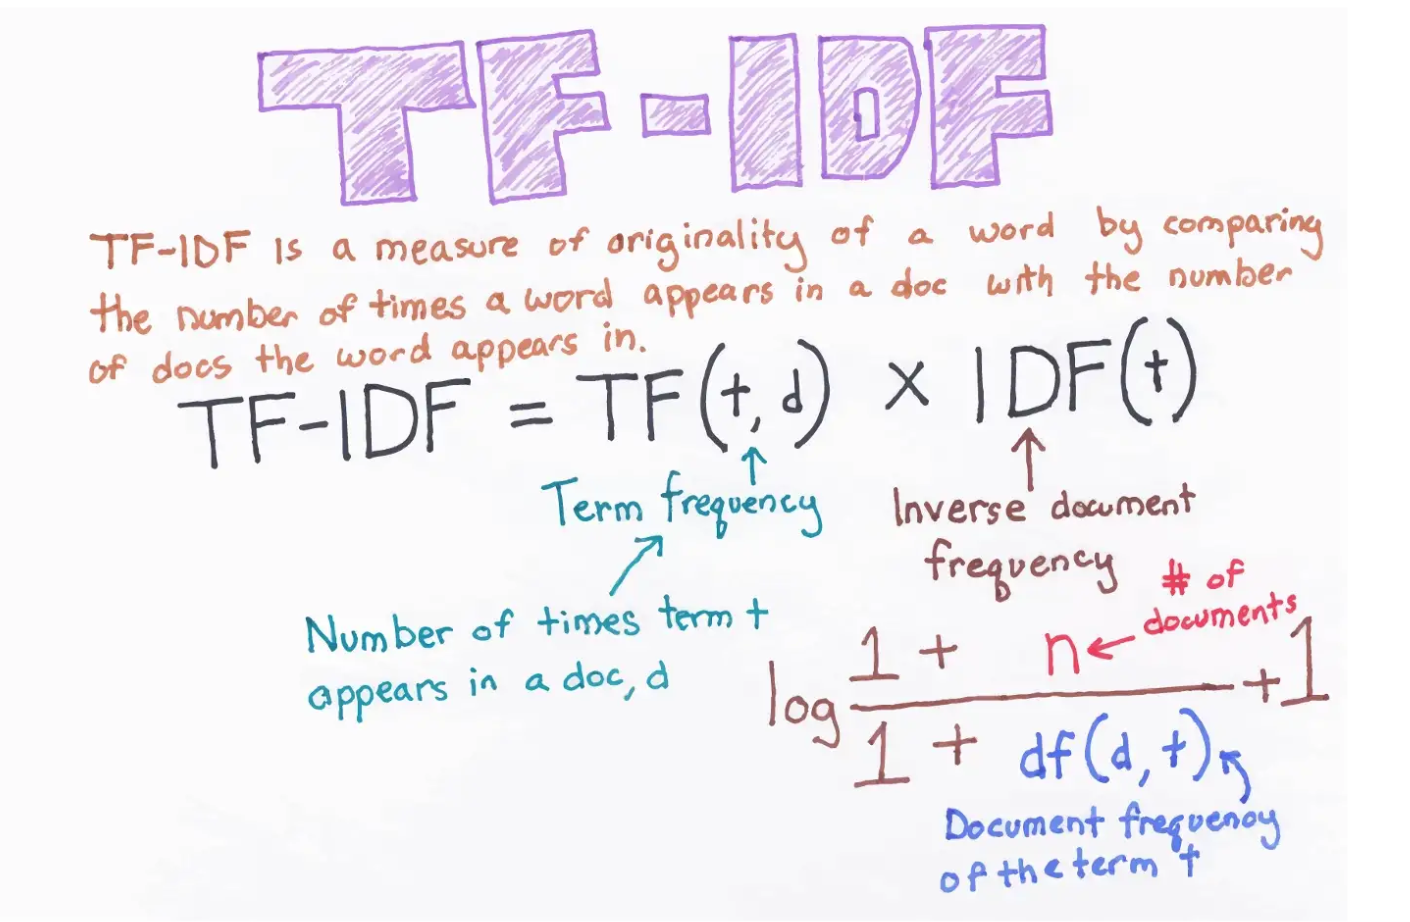

## TF-IDF

In [27]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


## TfidfVectorizer

In [29]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning) # tokenization will be done according to this function
tfidf

TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f9d4a235e50>)

In [31]:
type(tfidf)

sklearn.feature_extraction.text.TfidfVectorizer

In [32]:
# svm classifier

classifier = LinearSVC()

In [33]:
classifier

LinearSVC()

## Splitting the dataset into train and test set

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
x_train

2572    An Italian reviewer called this "a small, grea...
526                          And it was way to expensive.
1509    As an earlier review noted, plug in this charg...
144     Nice blanket of moz over top but i feel like t...
2483    The film gives meaning to the phrase, "Never i...
                              ...                        
763                       But the service was beyond bad.
835     I paid the bill but did not tip because I felt...
1653              Utter crap.. Sound quality is TERRIBLE.
2607    The only place good for this film is in the ga...
2732             She is as lovely as usual, this cutie!  
Name: Review, Length: 2198, dtype: object

In [36]:
x_train.shape

(2198,)

In [37]:
x_test

1801                 For the price this was a great deal.
1590                  Sprint - terrible customer service.
2382    This was reflected not only in the cast, but a...
2447    This movie is so mind-bendingly awful, it coul...
1147                     Its reception is very very poor.
                              ...                        
1043                       I only hear garbage for audio.
878     I love the owner/chef, his one authentic Japan...
1763    This particular model would not work with my M...
303                               Food was really boring.
132     They have a good selection of food including a...
Name: Review, Length: 550, dtype: object

In [38]:
x_test.shape

(550,)

In [39]:
y_train

2572    1
526     0
1509    0
144     1
2483    1
       ..
763     0
835     0
1653    0
2607    0
2732    1
Name: Sentiment, Length: 2198, dtype: int64

In [40]:
y_train.shape

(2198,)

In [41]:
y_test

1801    1
1590    0
2382    0
2447    0
1147    0
       ..
1043    0
878     1
1763    0
303     0
132     1
Name: Sentiment, Length: 550, dtype: int64

In [42]:
y_test.shape

(550,)

In [43]:
x_train.shape, x_test.shape
# 2198 samples in training dataset and 550 in test dataset

((2198,), (550,))

In [44]:
y_train.shape, y_test.shape

((2198,), (550,))

## Create a pipeline object and fit the data (training)

In [45]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classification
clf

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f9d4a235e50>)),
                ('clf', LinearSVC())])

In [46]:
clf.fit(x_train, y_train) # fitting our data, training happens here

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f9d4a235e50>)),
                ('clf', LinearSVC())])

## Predict the test set results

In [47]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[200,  79],
       [ 51, 220]])

In [49]:
# classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.72      0.75       279
           1       0.74      0.81      0.77       271

    accuracy                           0.76       550
   macro avg       0.77      0.76      0.76       550
weighted avg       0.77      0.76      0.76       550



In [50]:
accuracy_score(y_test, y_pred)


0.7636363636363637

76% accuracy

In [52]:
clf.predict(["Wow, NLP is interesting to learn"]) # positive

array([1])

In [55]:
clf.predict(["NLP is hard!"]) # negative

array([0])

In [57]:
clf.predict(["I had a very terrible day today"]) # negative

array([0])

In [60]:
clf.predict(["Yellow is a cheerful color"]) # positive

array([1])